In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Data Visualization with Matplotlib or Seaborn**
1. Image Gallery: https://matplotlib.org/gallery.html
2. Seaborn default color **palette**: deep, muted, pastel, bright, dark & colorblind, and Blues, RdBu
3. ***sns.relplot***: kind='scatter', 'line'
4. ***sns.catplot***: kind='count', 'bar', 'box', 'point'
5. ***sns.displot***: kind= 'hist', 'kde'
6. **figure size**: 
> * plt.figure(figsize=[6, 4]) for plt and sns
> * figsize=[6,4] in plt.subplots()
> * set height=5 and aspect=3/2 for relplot, catplot and displot







Setting up Plots

In [ ]:
plt.style.use('ggplot') # use print(plt.style.available) to see other styles
sns.set_context('notebook') # paper, notebook, talk, poster
sns.set_style('ticks')  # show ticks

# Used Datasets

In [ ]:
print(sns.get_dataset_names())  # built-in datasets in seaborn

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# **Multiple Plots with plt.subplots** and Customizing Plots

Multiple Plots

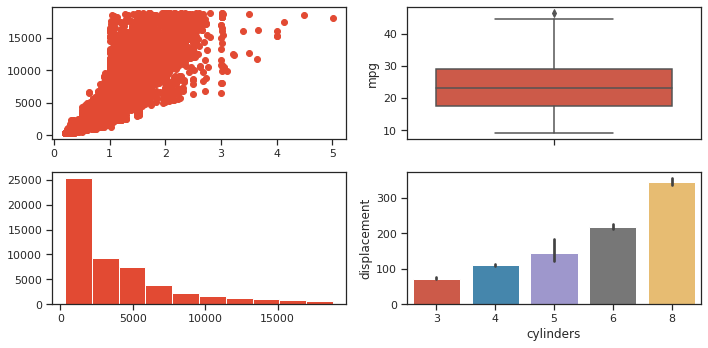

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=[10,5]) # sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}
ax[0,0].scatter(diamonds['carat'], diamonds['price'])
sns.boxplot(ax=ax[0,1], data=mpg, y='mpg')
ax[1,0].hist(diamonds['price'], bins=10)
sns.barplot(ax=ax[1,1], data=mpg, x='cylinders', y='displacement')
fig.tight_layout()  # spcing between plots
plt.show()

In [ ]:
mpg_year = mpg.set_index('model_year') # change the index
mpg_year.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
model_year,,,,,,,,
70,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
70,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320
70,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite
70,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst
70,17.0,8,302.0,140.0,3449,10.5,usa,ford torino


In [ ]:
by_year_mean = mpg_year.groupby('model_year').mean()
by_year_mean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
model_year,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704


Two Line Plots with two y-axes on the same x-axis and Customizing

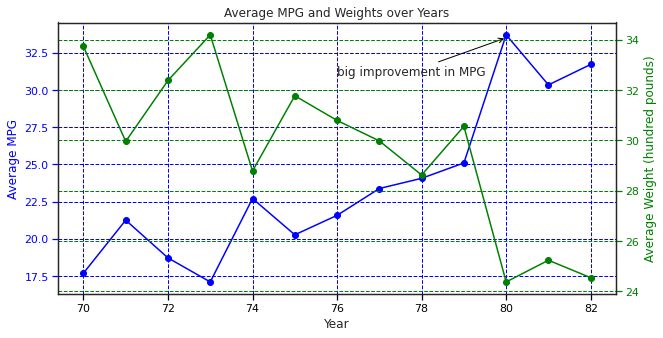

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 5])
ax.plot(by_year_mean.index, by_year_mean['mpg'], color='blue', marker='o')
ax.set_title('Average MPG and Weights over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average MPG', color = 'blue')
ax.tick_params('y', colors = 'blue')
ax.tick_params('x', colors = 'black')
ax.annotate('big improvement in MPG', xy=(80, 33.5), 
            xytext=(76, 31), arrowprops={'arrowstyle':'->', 'color':'black'})
ax.grid(True, color='blue', linestyle='--')

ax1 = ax.twinx()  # same x, but another y
ax1.plot(by_year_mean.index, by_year_mean['weight']/100, color='green', marker='o')
ax1.set_ylabel('Average Weight (hundred pounds)', color = 'green')
ax1.tick_params('y', colors = 'green')
ax1.grid(True, color='green', linestyle='--')

plt.show()

Same Scatter Plots as above withoug grouping the dataset mpg by year

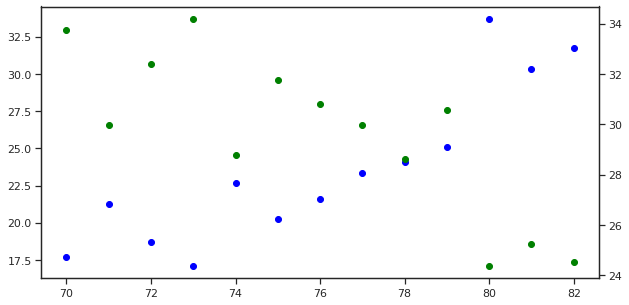

In [ ]:
fig, ax = plt.subplots(figsize=[10,5])
ax1 = ax.twinx()

years = mpg['model_year'].unique()
for year in years:
  year_df = mpg[mpg['model_year'] == year]
  ax.scatter(year, year_df['mpg'].mean(), color='blue')
  ax1.scatter(year, year_df['weight'].mean()/100, color='green')

plt.show()

Same line plot as above

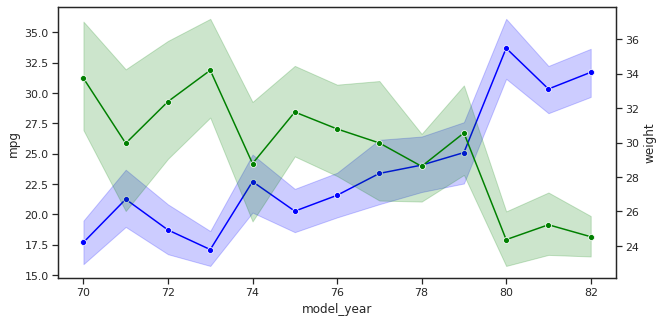

In [ ]:
fig, ax = plt.subplots(figsize=[10,5])

sns.lineplot(ax=ax, x=mpg['model_year'], y=mpg['mpg'], color='blue', marker='o')
ax1 = ax.twinx()
sns.lineplot(ax=ax1, x=mpg['model_year'], y=mpg['weight']/100, color='green', marker='o')

plt.show()

# Plots Using plt and sns

Plot with log scaling on x and y axes


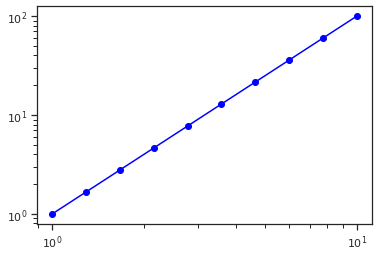

In [ ]:
x = np.logspace(0, 1, 10) 
y = x**2 
plt.loglog(x, y, "bo-")
plt.show()

Multiple Histograms with Steps

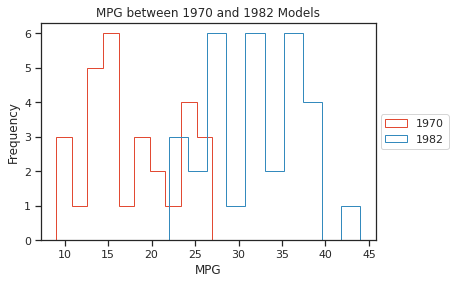

In [ ]:
fig, ax = plt.subplots()
ax.hist(mpg[mpg['model_year']==70]['mpg'], label=1970, histtype='step', bins=10)
ax.set(title='MPG between 1970 and 1982 Models', xlabel='MPG', ylabel='Frequency')
ax.hist(mpg[mpg['model_year']==82]['mpg'], label=1982, histtype='step', bins=10)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # the legend box outside the plot area
plt.show()

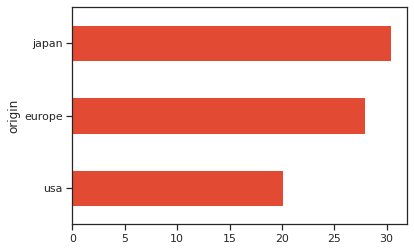

In [ ]:
by_origin = mpg.groupby('origin')['mpg'].mean().sort_values()
by_origin.plot(kind='barh')
plt.show()

Stacked Bar Plots

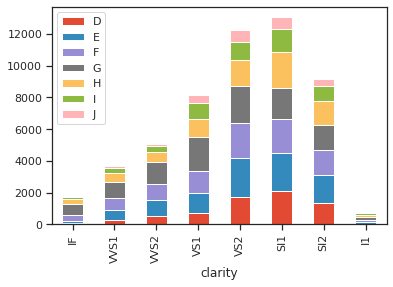

In [ ]:
table = pd.crosstab(diamonds['clarity'], diamonds['color'])
table.plot(kind='bar', stacked=True)
plt.legend()
plt.show()

In [ ]:
car_crashes_abb = car_crashes.set_index('abbrev') # change the index
car_crashes_abb.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


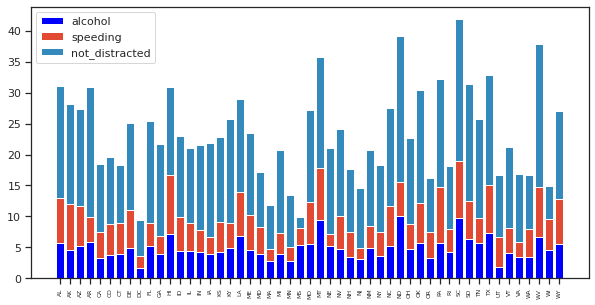

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 5])
ax.bar(car_crashes_abb.index, car_crashes_abb['alcohol'], label='alcohol', color='blue')
ax.set_xticklabels(car_crashes_abb.index, rotation=90, size=6)
ax.bar(car_crashes_abb.index, car_crashes_abb['speeding'], 
       bottom=car_crashes_abb['alcohol'], label='speeding')
ax.bar(car_crashes_abb.index, car_crashes_abb['not_distracted'], 
       bottom=car_crashes_abb['alcohol']+car_crashes_abb['speeding'], label='not_distracted')
ax.legend()
plt.show()

Boxplots

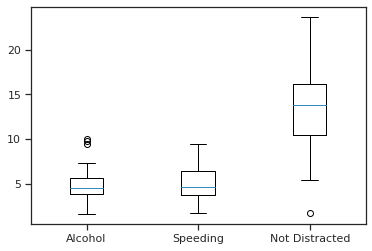

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([car_crashes['alcohol'], car_crashes['speeding'], car_crashes['not_distracted']])
ax.set_xticklabels(['Alcohol', 'Speeding', 'Not Distracted'])
plt.show()

Sactter Plots

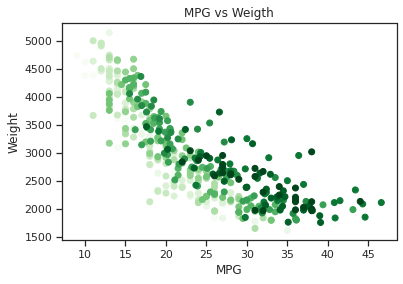

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mpg_year['mpg'], mpg_year['weight'], c=mpg_year.index, cmap=plt.cm.Greens)
ax.set(title = 'MPG vs Weigth',
       xlabel = 'MPG',
       ylabel = 'Weight')
plt.show()

Removing the top and right axes

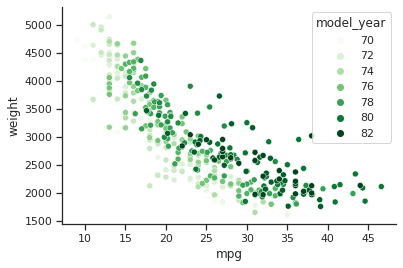

In [ ]:
sns.scatterplot(data=mpg_year, x='mpg', y='weight', hue=mpg_year.index, palette='Greens')
sns.despine(top=True, right=True)
plt.show()

# **sns.relplot:** scatter plot, line plot

Scatter Plots

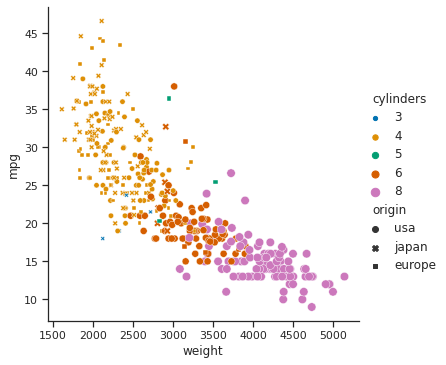

In [ ]:
sns.relplot(data=mpg, x='weight', y='mpg', kind='scatter', 
            hue='cylinders', size='cylinders', style='origin', palette='colorblind')  # same as sns.scatterplot
plt.show()

Line Plots

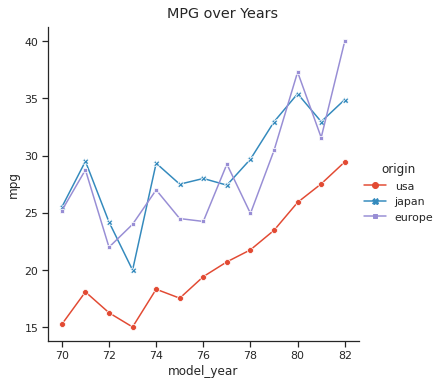

In [ ]:
g = sns.relplot(data=mpg, x='model_year', y='mpg', kind='line', 
            hue='origin', style='origin', markers=True, dashes=False, ci=None)
g.fig.suptitle('MPG over Years', y=1.02)  # same as plt.title('MPG over Years')
plt.show()

Scatter Subplots using sns.relplot

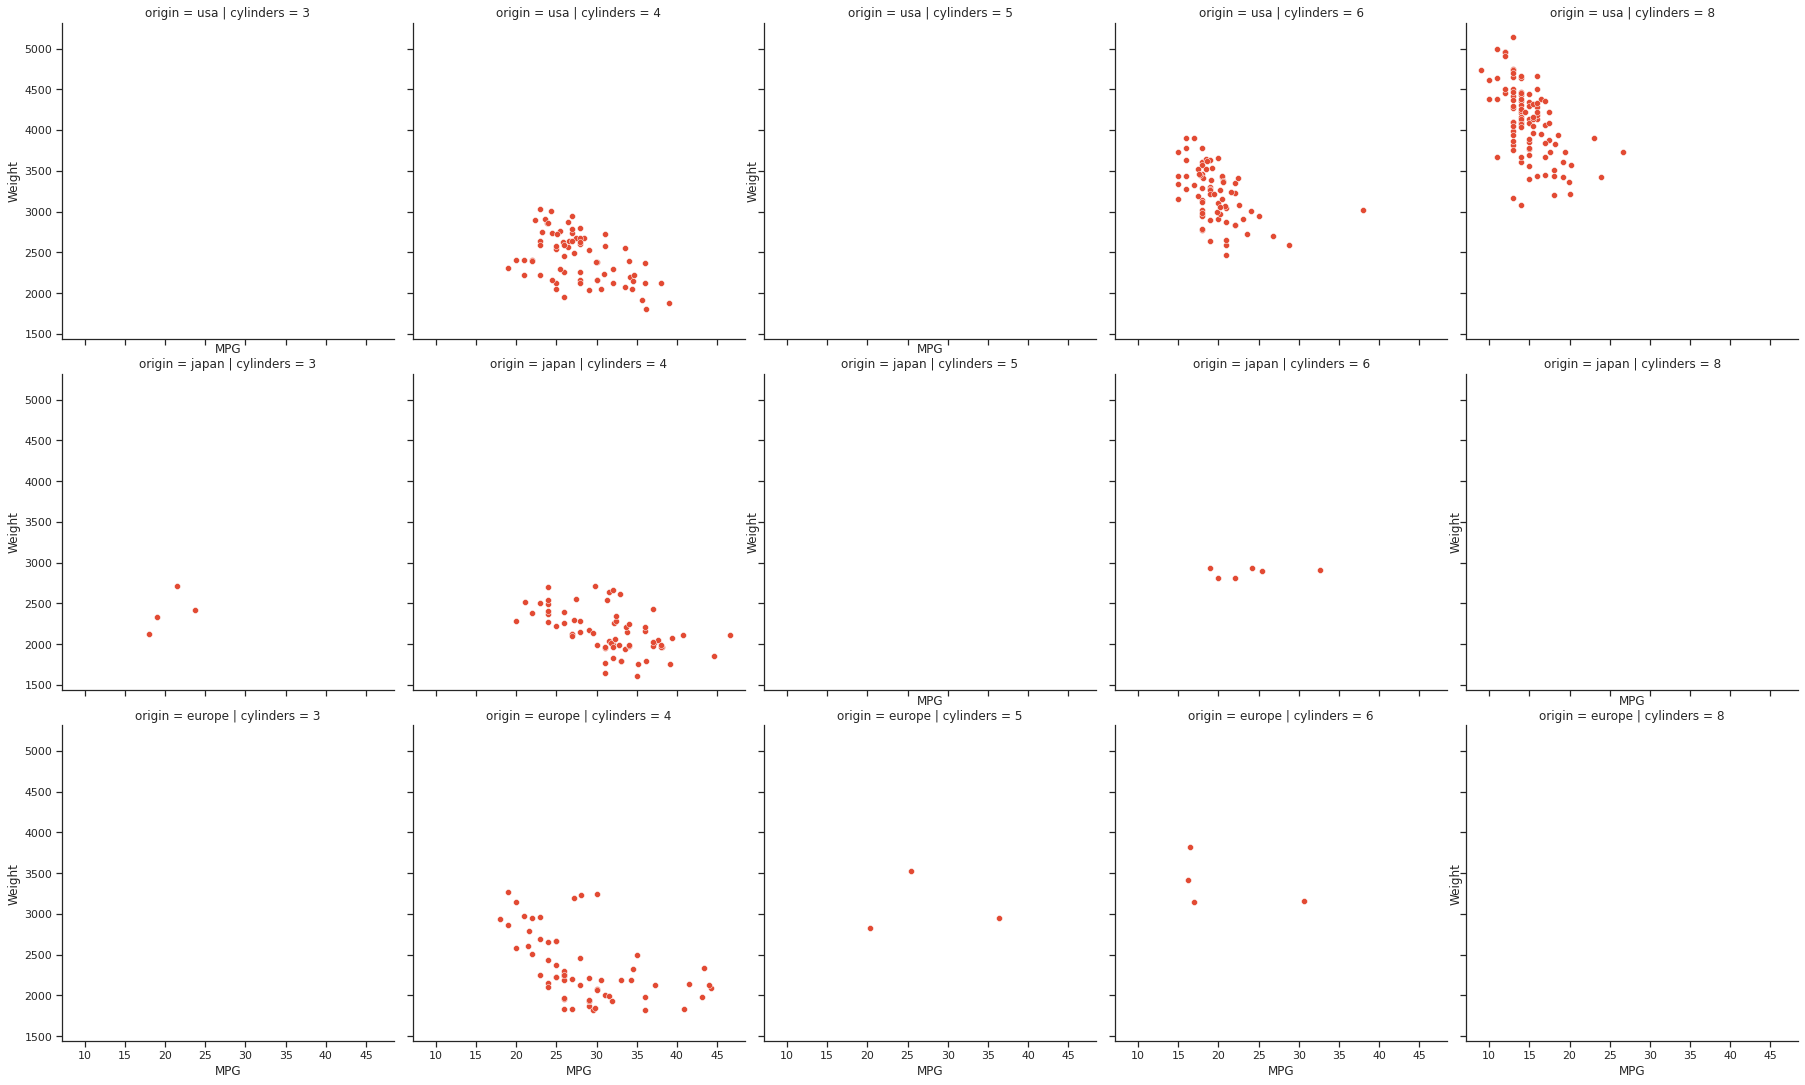

In [ ]:
g = sns.relplot(x='mpg', y='weight', data=mpg, kind='scatter', row='origin', col='cylinders')
g.set(xlabel='MPG', ylabel='Weight')
plt.show()

# **sns.catplot**: count plot, bar plot, box plot, point plot

Count Plots

In [ ]:
mpg.groupby('cylinders')['cylinders'].value_counts().sort_values(ascending=False)

cylinders  cylinders
4          4            204
8          8            103
6          6             84
3          3              4
5          5              3
Name: cylinders, dtype: int64

<function matplotlib.pyplot.show>

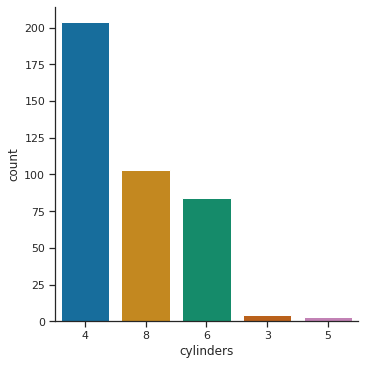

In [ ]:
sns.catplot(data=mpg, x='cylinders', kind='count', 
            palette='colorblind', order=mpg['cylinders'].value_counts().index)  # same as sns.countplot
plt.show

<function matplotlib.pyplot.show>

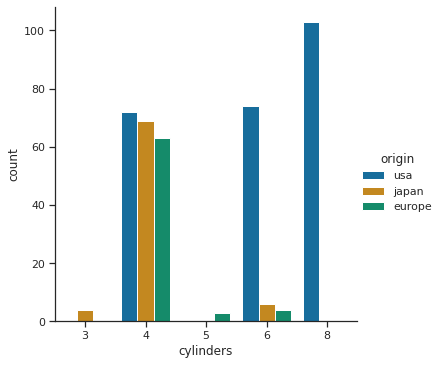

In [ ]:
sns.catplot(data=mpg, x='cylinders', hue='origin', kind='count', 
            palette='colorblind')  # same as sns.countplot
plt.show

Bar Plots

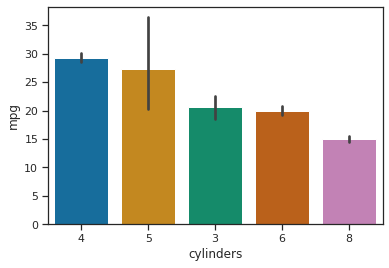

In [ ]:
by_cylinders = mpg.groupby('cylinders')['mpg'].agg(np.mean).reset_index().sort_values('mpg', ascending=False) # arranging in descending order
sns.barplot(data=mpg, x='cylinders', y='mpg',
            palette='colorblind', order=by_cylinders['cylinders'])  # same as sns.catplot with kind='bar'
plt.show()

sns.barplot and sns.catplot(kind='bar') are showing bars for the mean of each group

In [ ]:
mpg.groupby('cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

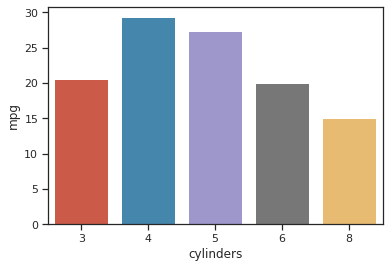

In [ ]:
sns.barplot(data=mpg, x='cylinders', y='mpg', ci=None)  # estimator=np.median

plt.bar is showing bars for the max of each group

In [ ]:
mpg.groupby('cylinders')['mpg'].max()

cylinders
3    23.7
4    46.6
5    36.4
6    38.0
8    26.6
Name: mpg, dtype: float64

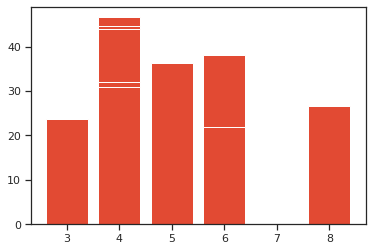

In [ ]:
plt.bar(mpg['cylinders'], mpg['mpg'])
plt.show()

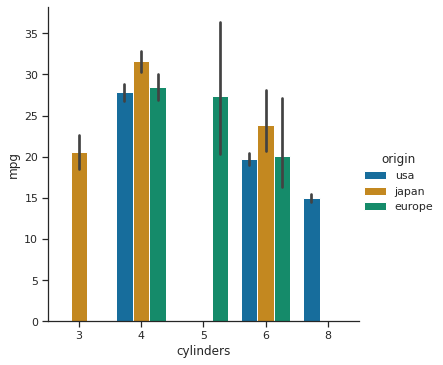

In [ ]:
sns.catplot(data=mpg, x='cylinders', y='mpg', kind='bar', hue='origin', 
            palette='colorblind')
plt.show()

Point Plots

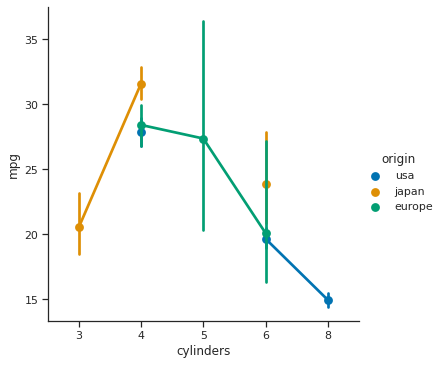

In [ ]:
sns.catplot(data=mpg, x='cylinders', y='mpg', kind='point', hue='origin', palette='colorblind')
# same as sns.pointplot
# same as above, but points intead of bars
plt.show()

Mutiple Box Plots

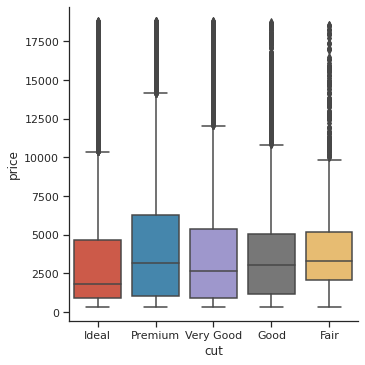

In [ ]:
sns.catplot(data=diamonds, x='cut', y='price', kind='box')  # same as sns.boxplot

# **Regression Plots:** regplot, lmplot

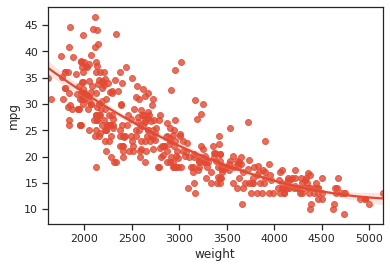

In [ ]:
sns.regplot(data=mpg, x='weight', y='mpg', order=2)
plt.show()

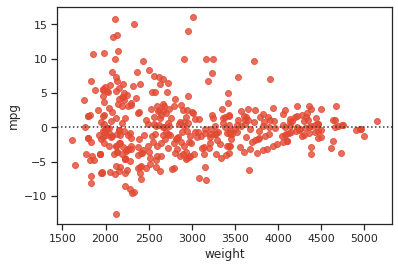

In [ ]:
sns.residplot(data=mpg, x='weight', y='mpg', order=2)
plt.show()

<function matplotlib.pyplot.show>

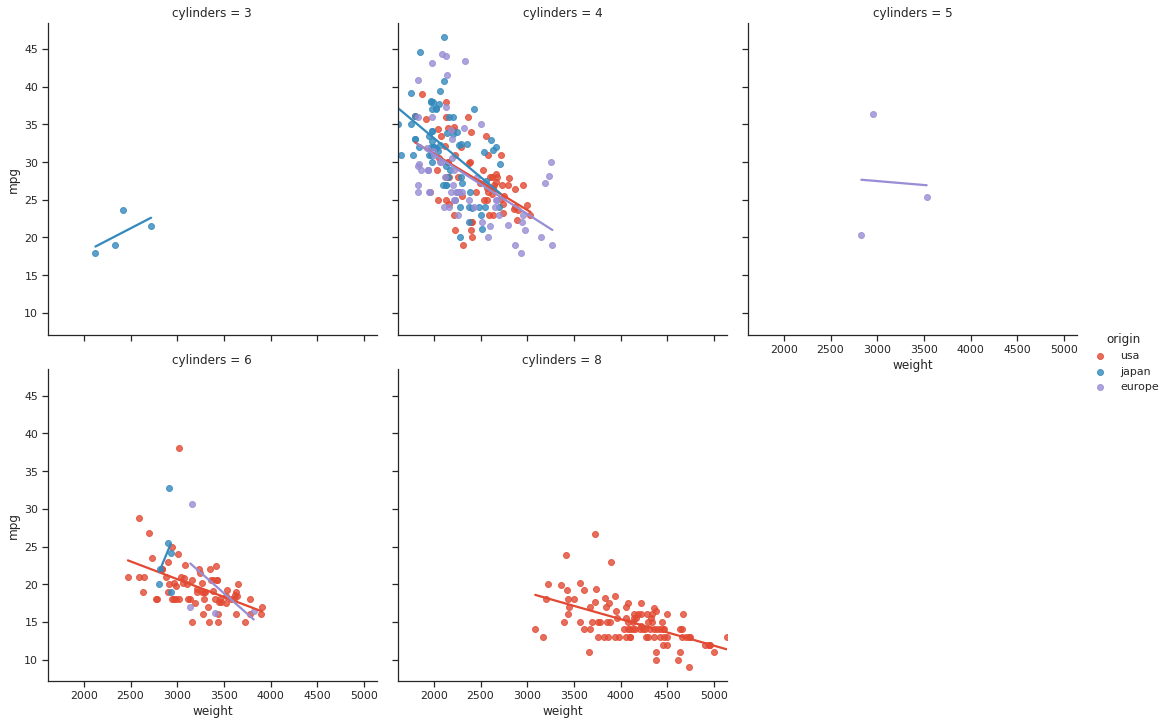

In [ ]:
sns.lmplot(data=mpg, x='weight', y='mpg', hue='origin', col='cylinders', col_wrap=3, ci=None)
plt.show

# **Heat Map**

Cross table for two variables

In [ ]:
cut_clarity = pd.crosstab(diamonds['cut'], diamonds['clarity'])
cut_clarity

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146
Premium,230,616,870,1989,3357,3575,2949,205
Very Good,268,789,1235,1775,2591,3240,2100,84
Good,71,186,286,648,978,1560,1081,96
Fair,9,17,69,170,261,408,466,210


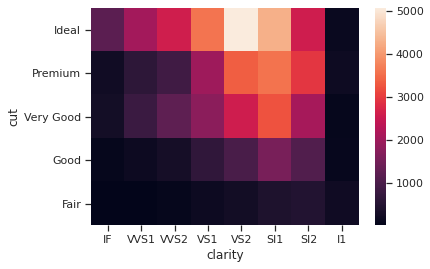

In [ ]:
sns.heatmap(cut_clarity)

Cross table about one variable for two variables

In [ ]:
price_cut_clarity = pd.crosstab(diamonds['cut'], diamonds['clarity'], values=diamonds['price'], aggfunc=np.mean)
price_cut_clarity

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.913366,2468.129458,3250.290100,3489.744497,3284.550385,3752.118169,4755.952656,4335.726027
Premium,3856.143478,2831.206169,3795.122989,4485.462041,4550.331248,4455.269371,5545.936928,3947.331707
Very Good,4396.216418,2459.441065,3037.765182,3805.353239,4215.759552,3932.391049,4988.688095,4078.226190
Good,4098.323944,2254.774194,3079.108392,3801.445988,4262.236196,3689.533333,4580.260870,3596.635417
Fair,1912.333333,3871.352941,3349.768116,4165.141176,4174.724138,4208.279412,5173.916309,3703.533333


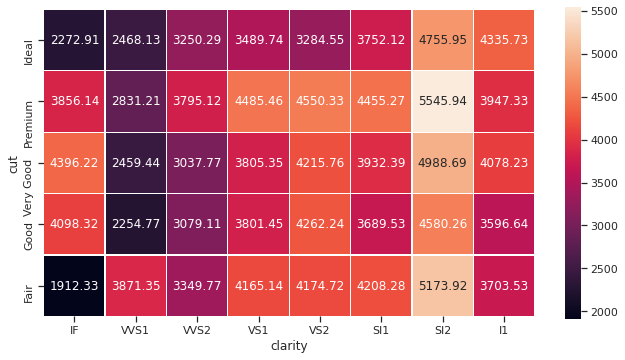

In [ ]:
plt.figure(figsize=[11,7])
sns.heatmap(price_cut_clarity, annot=True, square=True, fmt='0.2f', linewidths=0.2, cbar_kws={"shrink": .82})
plt.show()

# **Pair Plots**

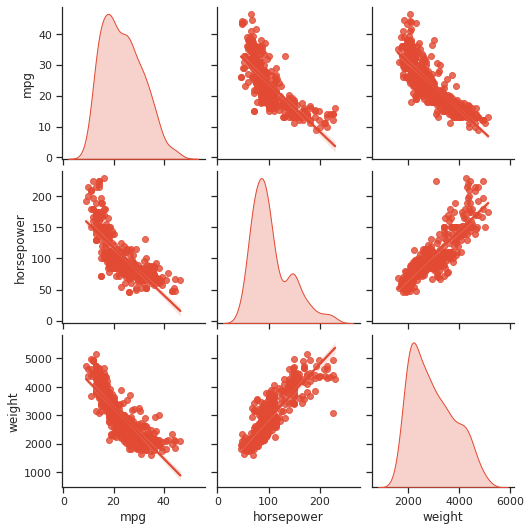

In [ ]:
sns.pairplot(data=mpg, vars=['mpg', 'horsepower', 'weight'], kind='reg', diag_kind='kde')
plt.show()

Pariplot is NOT good if deal with two different sets of columns. Thus combine them into one set and use the above code.

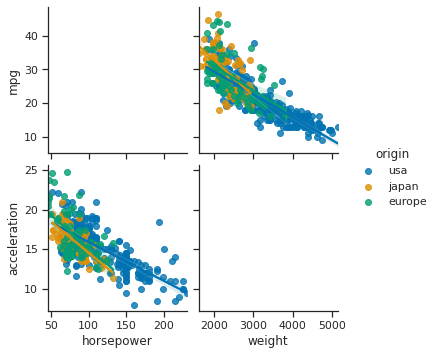

In [ ]:
sns.pairplot(data=mpg, x_vars=['horsepower', 'weight'], y_vars=['mpg', 'acceleration'], 
             kind='reg', hue='origin', palette='colorblind')
plt.show()

# **Joint Plots**

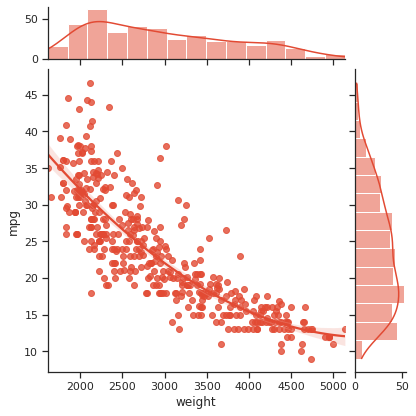

In [ ]:
sns.jointplot(data=mpg, x='weight', y='mpg', kind='reg', order=2,
              marginal_kws=dict(bins=15), marginal_ticks=True)
plt.show()

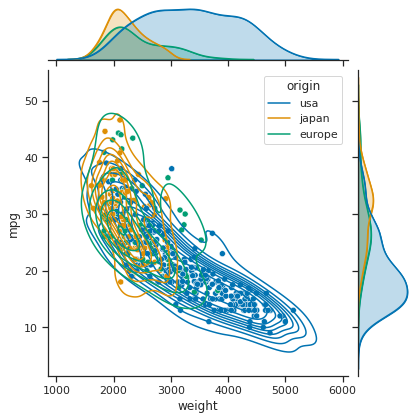

In [ ]:
g = sns.jointplot(data=mpg, x='weight', y='mpg', kind='scatter', hue='origin', palette='colorblind')
g.plot_joint(sns.kdeplot, color='green')
g.plot_marginals(sns.kdeplot)
plt.show()